LightGBM

Generalized Additive Models (GAM) 

Convolutional Neural Networks (CNN) 

Long Short-Term Memory Networks (LSTM) 

Transformer-based Models

Wavenet

InceptionTime

In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('./solar_weather_processed.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Energy delta_Wh  196776 non-null  int64  
 1   GHI              196776 non-null  float64
 2   temp             196776 non-null  float64
 3   pressure         196776 non-null  float64
 4   humidity         196776 non-null  float64
 5   wind_speed       196776 non-null  float64
 6   rain_1h          196776 non-null  float64
 7   clouds_all       196776 non-null  float64
 8   Year             196776 non-null  int64  
 9   Month_num        196776 non-null  int64  
 10  DayOfYear        196776 non-null  int64  
 11  Minute           196776 non-null  int64  
 12  Hour             196776 non-null  int64  
 13  Season           196776 non-null  int64  
 14  Day              196776 non-null  int64  
 15  Week_cos         196776 non-null  float64
 16  Energy_lag_1     196776 non-null  floa

In [4]:
df['Energy delta_Wh'].describe()

count    196776.00000
mean        573.00310
std        1044.82681
min           0.00000
25%           0.00000
50%           0.00000
75%         577.00000
max        5020.00000
Name: Energy delta_Wh, dtype: float64

In [5]:
df.head()

,Energy delta_Wh,GHI,temp,pressure,humidity,wind_speed,rain_1h,clouds_all,Year,Month_num,DayOfYear,Minute,Hour,Season,Day,Week_cos,Energy_lag_1,Energy_lag_2
0,0,0.0,1.6,1021.0,100.0,4.9,0.0,100.0,2017,1,1,0,0,3,6,0.992981,0.0,0.0
1,0,0.0,1.6,1021.0,100.0,4.9,0.0,100.0,2017,1,1,15,0,3,6,0.992981,0.0,0.0
2,0,0.0,1.6,1021.0,100.0,4.9,0.0,100.0,2017,1,1,30,0,3,6,0.992981,0.0,0.0
3,0,0.0,1.6,1021.0,100.0,4.9,0.0,100.0,2017,1,1,45,0,3,6,0.992981,0.0,0.0
4,0,0.0,1.7,1020.0,100.0,5.2,0.0,100.0,2017,1,1,0,1,3,6,0.992981,0.0,0.0


# Seperate file for model buiding only


In [6]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor, record_evaluation
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [7]:
FEATURES = [col for col in df.columns if col != 'Energy delta_Wh']
X = df[FEATURES]
y = df['Energy delta_Wh']

In [8]:
# 7. Time-based train-test split (70-30)
train_size = int(len(df) * 0.7)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [9]:
# Initialize scalers
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.to_numpy().reshape(-1, 1))



In [10]:
# Helper function for RMSE
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Models

## lightGBM

In [11]:
# import numpy as np
# import matplotlib.pyplot as plt
# from lightgbm import LGBMRegressor, record_evaluation
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# # Initialize LightGBM model
# model = LGBMRegressor(
#     n_estimators=500,
#     learning_rate=0.01,
#     max_depth=6,
#     num_leaves=64,         
#     bagging_fraction=0.8,  
#     feature_fraction=0.8,  
#     lambda_l1=0.1,         
#     lambda_l2=0.1,         
#     random_state=42,
# )

# evals_result = {}

# # Train the model with scaled data
# model.fit(
#     X_train_scaled, y_train_scaled.ravel(),  # Ensure y is 1D
#     eval_set=[(X_train_scaled, y_train_scaled.ravel()), (X_test_scaled, y_test_scaled.ravel())],
#     eval_metric='rmse',
#     callbacks=[record_evaluation(evals_result)]
# )

# # Predict with scaled data
# y_pred_scaled = model.predict(X_test_scaled)

# # Convert predictions back to original scale
# y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# # Calculate performance metrics using original values
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = root_mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("MAE:", mae)
# print("MSE:", mse)
# print("RMSE:", rmse)
# print("R^2:", r2)

# # Correct key names
# train_rmse_scaled = np.array(evals_result["valid_0"]["rmse"]).reshape(-1, 1)
# valid_rmse_scaled = np.array(evals_result["valid_1"]["rmse"]).reshape(-1, 1)

# train_rmse = scaler_y.inverse_transform(train_rmse_scaled).flatten()
# valid_rmse = scaler_y.inverse_transform(valid_rmse_scaled).flatten()

# # Plot the RMSE curve using original values
# plt.figure(figsize=(10, 5))
# plt.plot(train_rmse, label="Training RMSE")
# plt.plot(valid_rmse, label="Validation RMSE")
# plt.xlabel("Iterations")
# plt.ylabel("RMSE")
# plt.title("LightGBM Model")
# plt.legend()
# plt.show()


#### Hyperparameter for lightgbm

In [12]:
# import numpy as np
# import matplotlib.pyplot as plt
# from lightgbm import LGBMRegressor, record_evaluation
# from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# # Initialize scalers
# scaler_x = MinMaxScaler()
# scaler_y = MinMaxScaler()

# # Scale the features and target
# X_train_scaled = scaler_x.fit_transform(X_train)
# X_test_scaled = scaler_x.transform(X_test)
# y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).flatten()
# y_test_scaled = scaler_y.transform(y_test.to_numpy().reshape(-1, 1)).flatten()

# # Define parameter grid
# param_grid = {
#     'n_estimators': [500, 1000],
#     'learning_rate': [0.01, 0.05],
#     'max_depth': [6, 8],
#     'num_leaves': [64, 128],    
#     'bagging_fraction': [0.8, 1.0],
#     'feature_fraction': [0.8, 1.0],
#     'lambda_l1': [0.0, 0.1],
#     'lambda_l2': [0.0, 0.1]
# }

# # Use TimeSeriesSplit
# tscv = TimeSeriesSplit(n_splits=2)

# # Initialize LightGBM model
# model = LGBMRegressor(random_state=42)

# # Set up GridSearchCV
# grid_search = GridSearchCV(
#     estimator=model,
#     param_grid=param_grid,
#     scoring='neg_root_mean_squared_error',  # Negative RMSE
#     cv=tscv,
#     verbose=1,
#     n_jobs=2  # Limit parallelism
# )

# # Fit GridSearchCV on scaled training data
# grid_search.fit(X_train_scaled, y_train_scaled)

# # Best parameters and best RMSE (scaled)
# print("Best Parameters (Grid Search):", grid_search.best_params_)
# print("Best RMSE (CV) [Scaled]:", -grid_search.best_score_)

# # Retrieve best model
# best_model = grid_search.best_estimator_

# # Display best model parameters
# print("\nAll Best Model Hyperparameters:")
# for param, value in best_model.get_params().items():
#     print(f"{param}: {value}")

# # Train the best model again to record evaluation results
# evals_result = {}
# best_model.fit(
#     X_train_scaled, y_train_scaled,
#     eval_set=[(X_train_scaled, y_train_scaled), (X_test_scaled, y_test_scaled)],
#     eval_metric='rmse',
#     callbacks=[record_evaluation(evals_result)]
# )

# # Predict with scaled data
# y_pred_scaled = best_model.predict(X_test_scaled)

# # Convert predictions back to original scale
# y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# # Evaluate using original scale
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = root_mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("\nTest MAE:", mae)
# print("Test MSE:", mse)
# print("Test RMSE:", rmse)
# print("R^2:", r2)



#### Best Model

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008558 seconds.


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l1 is set=0.1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1
[LightGBM] [Warning] lambda_l2 is set=0.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
MAE: 98.63859216833417
MSE: 60699.08012290522
RMSE: 246.3718330550496
R^2: 0.9434038341014805


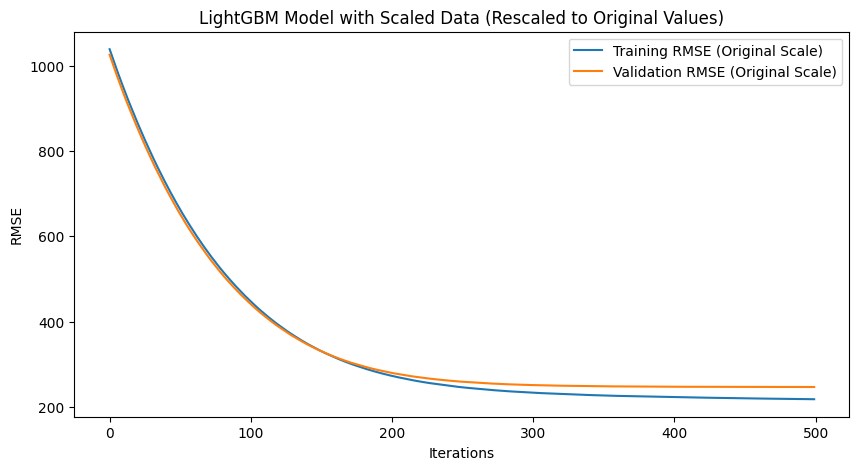

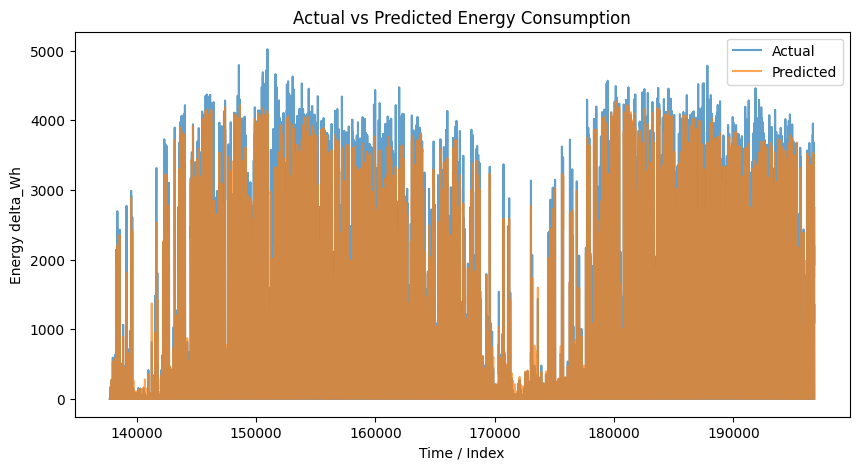

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor, record_evaluation
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib  # Import joblib for saving the model


# Initialize scalers
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale the features and target
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.to_numpy().reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.to_numpy().reshape(-1, 1)).flatten()

# Best parameters from Grid Search
model = LGBMRegressor(
    n_estimators=500,
    learning_rate=0.01,
    max_depth=8,
    num_leaves=64,    
    bagging_fraction=0.8,
    feature_fraction=0.8,
    lambda_l1=0.1,
    lambda_l2=0.0,
    random_state=42,
)

# Dictionary to store training history
evals_result = {}

# Fit the model on the scaled training data
model.fit(
    X_train_scaled, y_train_scaled,
    eval_set=[(X_train_scaled, y_train_scaled), (X_test_scaled, y_test_scaled)],
    eval_metric='rmse',
    callbacks=[record_evaluation(evals_result)]
)

# Save the trained model to a file
joblib.dump(model, 'lightgbm_model.pkl')
# After fitting the scalers
joblib.dump(scaler_x, 'scaler_x.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

# Predict on the scaled test set
y_pred_scaled = model.predict(X_test_scaled)

# Convert predictions back to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Evaluate the model using original scale
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)

# Convert RMSE values for plotting
train_rmse_scaled = np.array(evals_result["training"]["rmse"]).reshape(-1, 1)
valid_rmse_scaled = np.array(evals_result["valid_1"]["rmse"]).reshape(-1, 1)

# Inverse transform to original scale
train_rmse = scaler_y.inverse_transform(train_rmse_scaled).flatten()
valid_rmse = scaler_y.inverse_transform(valid_rmse_scaled).flatten()

# Plot RMSE curve in original values
plt.figure(figsize=(10, 5))
plt.plot(train_rmse, label="Training RMSE (Original Scale)")
plt.plot(valid_rmse, label="Validation RMSE (Original Scale)")
plt.xlabel("Iterations")
plt.ylabel("RMSE")
plt.title("LightGBM Model with Scaled Data (Rescaled to Original Values)")
plt.legend()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual', alpha=0.7)
plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
plt.xlabel('Time / Index')
plt.ylabel('Energy delta_Wh')
plt.title('Actual vs Predicted Energy Consumption')
plt.legend()
plt.show()


## GAM

In [100]:
# import numpy as np
# import matplotlib.pyplot as plt
# from pygam import ExpectileGAM, s
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.utils import shuffle

# # -------------------------
# # 1. Learning Curve
# # -------------------------

# # Define the model
# gam = ExpectileGAM(
#     s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) +
#     s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16)
# )

# # Print model summary to see the final chosen hyperparameters and significance of terms

# # Define training set sizes (10%, 20%, ..., 100%)
# train_sizes = np.linspace(0.1, 1.0, 10)  # 10 steps from 10% to 100%
# train_rmse = []
# val_rmse = []

# # Shuffle data to ensure randomness in sampling
# X_train, y_train = shuffle(X_train, y_train, random_state=42)

# # Train model on progressively larger subsets of the training data
# for frac in train_sizes:
#     subset_size = int(frac * len(X_train))
#     X_sub, y_sub = X_train[:subset_size], y_train[:subset_size]
    
#     # Fit the model on the subset
#     gam.fit(X_sub, y_sub)
    
    
#     # Compute RMSE on training subset and validation (test) set
#     y_train_pred = gam.predict(X_sub)
#     y_val_pred = gam.predict(X_test)
    
#     train_rmse.append(np.sqrt(mean_squared_error(y_sub, y_train_pred)))
#     val_rmse.append(np.sqrt(mean_squared_error(y_test, y_val_pred)))

# # Plot the learning curve
# plt.figure(figsize=(10, 5))
# plt.plot(train_sizes * 100, train_rmse, label="Training RMSE", marker="o", color="blue")
# plt.plot(train_sizes * 100, val_rmse, label="Validation RMSE", marker="o", color="orange")

# plt.xlabel("Training Data Size (%)")
# plt.ylabel("RMSE")
# plt.title("Learning Curve for GAM Model")
# plt.legend()
# plt.grid()
# plt.show()

# # -------------------------
# # 2. Final Model Training & Evaluation
# # -------------------------

# # Train final model on the entire training set
# gam.fit(X_train, y_train)

# # Predict on the test set
# y_pred = gam.predict(X_test)

# # Compute accuracy metrics
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test, y_pred)

# # Print the metrics
# print("MAE:", mae)
# print("MSE:", mse)
# print("RMSE:", rmse)
# print("R^2:", r2)

# print(gam.summary())


# # -------------------------
# # 3. Plot Actual vs. Predicted
# # -------------------------
# plt.figure(figsize=(10, 5))
# plt.plot(y_test.index, y_test, label='Actual', alpha=0.7)
# plt.plot(y_test.index, y_pred, label='Predicted', alpha=0.7)
# plt.xlabel('Time / Index')
# plt.ylabel('Energy delta_Wh')
# plt.title('Actual vs Predicted Energy Consumption (GAM)')
# plt.legend()
# plt.show()


## CNN

### Set up the CNN requirements

In [12]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import (Conv1D, MaxPooling1D, GlobalAveragePooling1D,
                                     Dense, SpatialDropout1D, BatchNormalization, Dropout)
from keras.regularizers import l2
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, TerminateOnNaN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Sequence Creation with Striding
TIME_STEPS = 24  # 24 hours in 15-minute intervals

SEQ_STRIDE = 2


def create_sequences(X, y, time_steps, stride=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, stride):
        Xs.append(X[i:i + time_steps])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, TIME_STEPS, SEQ_STRIDE)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, TIME_STEPS, SEQ_STRIDE)

### CNN Base Model 

Epoch 1/100
1076/1076 [==============================] - 11s 8ms/step - loss: 0.0386 - mae: 0.0818 - val_loss: 0.0240 - val_mae: 0.0477
Epoch 2/100
1076/1076 [==============================] - 8s 7ms/step - loss: 0.0243 - mae: 0.0542 - val_loss: 0.0195 - val_mae: 0.0475
Epoch 3/100
1076/1076 [==============================] - 8s 7ms/step - loss: 0.0193 - mae: 0.0497 - val_loss: 0.0171 - val_mae: 0.0448
Epoch 4/100
1076/1076 [==============================] - 8s 7ms/step - loss: 0.0155 - mae: 0.0474 - val_loss: 0.0136 - val_mae: 0.0459
Epoch 5/100
1076/1076 [==============================] - 8s 7ms/step - loss: 0.0128 - mae: 0.0454 - val_loss: 0.0105 - val_mae: 0.0397
Epoch 6/100
1076/1076 [==============================] - 8s 8ms/step - loss: 0.0110 - mae: 0.0445 - val_loss: 0.0098 - val_mae: 0.0398
Epoch 7/100
1076/1076 [==============================] - 9s 9ms/step - loss: 0.0096 - mae: 0.0432 - val_loss: 0.0086 - val_mae: 0.0397
Epoch 8/100
1076/1076 [==============================]

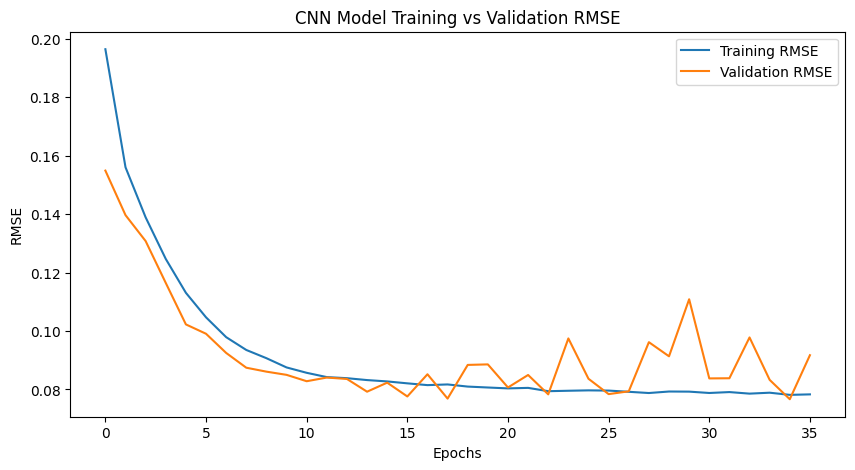

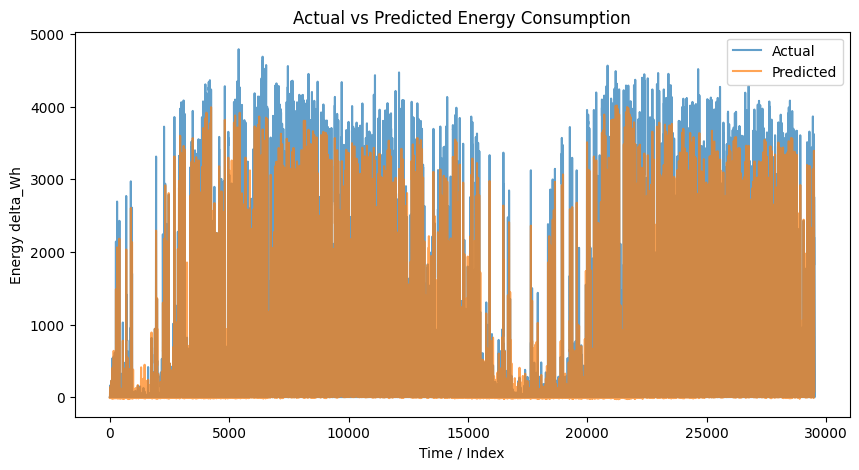

In [ ]:
# model = Sequential([
#     # First Conv Block with Large Context
#     Conv1D(32, 9, activation='relu', padding='causal',
#            dilation_rate=1, kernel_regularizer=l2(1e-4),
#            input_shape=(TIME_STEPS, X_train.shape[1])),
#     MaxPooling1D(2),
#     BatchNormalization(),
#     SpatialDropout1D(0.2),
    
#     # Second Conv Block with Medium Context
#     Conv1D(64, 5, activation='relu', padding='causal',
#            dilation_rate=3, kernel_regularizer=l2(1e-4)),
#     BatchNormalization(),
#     SpatialDropout1D(0.3),
    
#     # Third Conv Block with Local Context
#     Conv1D(128, 3, activation='relu', padding='causal',
#            dilation_rate=6, kernel_regularizer=l2(1e-4)),
#     GlobalAveragePooling1D(),
    
#     # Final Dense Layers
#     Dense(64, activation='relu', kernel_regularizer=l2(1e-4)),
#     Dropout(0.4),
#     Dense(1)
# ])

# optimizer = Adam(learning_rate=3e-4, clipnorm=0.5)
# model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# callbacks = [
#     EarlyStopping(patience=20, monitor='val_mae', restore_best_weights=True),
#     TerminateOnNaN()
# ]

# #   Memory-Efficient Training
# history = model.fit(
#     X_train_seq, y_train_seq,
#     epochs=100,
#     batch_size=64,
#     validation_data=(X_test_seq, y_test_seq),
#     callbacks=callbacks,
#     verbose=1
# )

# #   Make Predictions
# y_pred_scaled = model.predict(X_test_seq)
# y_pred = scaler_y.inverse_transform(y_pred_scaled)

# #   Evaluate
# y_test_seq_unscaled = scaler_y.inverse_transform(y_test_seq)

# mae = mean_absolute_error(y_test_seq_unscaled, y_pred)
# mse = mean_squared_error(y_test_seq_unscaled, y_pred)
# rmse = root_mean_squared_error(y_test_seq_unscaled, y_pred)
# r2 = r2_score(y_test_seq_unscaled, y_pred)

# print("MAE:", mae)
# print("MSE:", mse)
# print("RMSE:", rmse)
# print("R^2:", r2)

# #   Plot Training vs. Validation RMSE over epochs
# train_rmse = np.sqrt(history.history['loss'])
# val_rmse = np.sqrt(history.history['val_loss'])

# plt.figure(figsize=(10, 5))
# plt.plot(train_rmse, label='Training RMSE')
# plt.plot(val_rmse, label='Validation RMSE')
# plt.xlabel("Epochs")
# plt.ylabel("RMSE")
# plt.title("CNN Model Training vs Validation RMSE")
# plt.legend()
# plt.show()

# #   Plot Actual vs. Predicted
# plt.figure(figsize=(10, 5))
# plt.plot(y_test_seq_unscaled, label='Actual', alpha=0.7)
# plt.plot(y_pred, label='Predicted', alpha=0.7)
# plt.xlabel('Time / Index')
# plt.ylabel('Energy delta_Wh')
# plt.title('Actual vs Predicted Energy Consumption')
# plt.legend()
# plt.show()


### Hyperparameter for CNN

In [ ]:
# import kerastuner as kt


# @tf.autograph.experimental.do_not_convert

# def build_model(hp):
#     # Hyperparameters for the first block
#     filters_base = hp.Choice('filters_base', values=[32, 64])           
#     kernel_size_first = hp.Choice('kernel_size_first', values=[9, 7])     
#     # Other hyperparameters for optimizer and dense layer
#     learning_rate = hp.Choice('learning_rate', values=[1e-4, 3e-4])       
#     l2_reg = hp.Choice('l2_reg', values=[1e-4, 1e-5])                  
#     dropout_rate = hp.Choice('dropout_rate', values=[0.4, 0.3])     
#     dense_units = hp.Choice('dense_units', values=[64, 128])  

#     model = Sequential()
    
#     # --------------------------
#     # Block 1: Large Context
#     # --------------------------
#     model.add(Conv1D(filters=filters_base, 
#                      kernel_size=kernel_size_first, 
#                      activation='relu', 
#                      padding='causal',
#                      dilation_rate=1, 
#                      kernel_regularizer=l2(l2_reg),
#                      input_shape=(TIME_STEPS, X_train.shape[1])))
#     model.add(MaxPooling1D(2))
#     model.add(BatchNormalization())
#     model.add(SpatialDropout1D(0.2))
    
#     # --------------------------
#     # Block 2: Medium Context
#     # --------------------------
#     # Set filters for Block 2 as double the first block
#     block2_filters = filters_base * 2
#     # Choose kernel size for Block 2 based on the first block:
#     # If the first block uses 9, use 5 here (as in the memory‑optimized model);
#     # if the first block uses 7, use 3.
#     block2_kernel = 5 if kernel_size_first == 9 else 3
#     model.add(Conv1D(filters=block2_filters, 
#                      kernel_size=block2_kernel, 
#                      activation='relu', 
#                      padding='causal',
#                      dilation_rate=3, 
#                      kernel_regularizer=l2(l2_reg)))
#     model.add(BatchNormalization())
#     model.add(SpatialDropout1D(0.3))
    
#     # --------------------------
#     # Block 3: Local Context
#     # --------------------------
#     # Set filters for Block 3 as quadruple the first block
#     block3_filters = filters_base * 4
#     # Keep kernel size fixed at 3 for Block 3 (as in the memory‑optimized model)
#     block3_kernel = 3
#     model.add(Conv1D(filters=block3_filters, 
#                      kernel_size=block3_kernel, 
#                      activation='relu', 
#                      padding='causal',
#                      dilation_rate=6, 
#                      kernel_regularizer=l2(l2_reg)))
#     model.add(GlobalAveragePooling1D())
    
#     # --------------------------
#     # Dense Layers
#     # --------------------------
#     model.add(Dense(dense_units, activation='relu', kernel_regularizer=l2(l2_reg)))
#     model.add(Dropout(dropout_rate))
#     model.add(Dense(1))
    
#     optimizer = Adam(learning_rate=learning_rate, clipnorm=0.5)
#     model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    
#     return model

# # Create the tuner using Bayesian Optimization
# tuner = kt.BayesianOptimization(
#     build_model,
#     objective='val_mae',
#     max_trials=50,              # Total number of trials to run
#     executions_per_trial=1,     # Number of models to fit per trial
#     directory='hyperparameter_tuning',
#     project_name='energy_prediction_cnn',
#     overwrite=True
# )

# # Define early stopping callback for each trial
# stop_early = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss',
#     patience=10,
#     restore_best_weights=True
# )

# # Search for best hyperparameters
# tuner.search(
#     X_train_seq, y_train_seq,
#     epochs=20,
#     batch_size=64,
#     validation_data=(X_test_seq, y_test_seq),
#     callbacks=[stop_early],
#     verbose=1
# )

# # Get the best hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# print("Best Hyperparameters:")
# for param in best_hps.values:
#     print(f"{param}: {best_hps.get(param)}")


Trial 50 Complete [00h 05m 08s]
val_mae: 0.0340208001434803

Best val_mae So Far: 0.03152553737163544
Total elapsed time: 03h 33m 09s
Best Hyperparameters:
filters_base: 32
kernel_size_first: 7
learning_rate: 0.0003
l2_reg: 1e-05
dropout_rate: 0.3
dense_units: 128


### Best Model for CNN

Not yet find the best parameter

Epoch 1/100
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x00000218A0F32560>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x00000218A0F32560>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. 

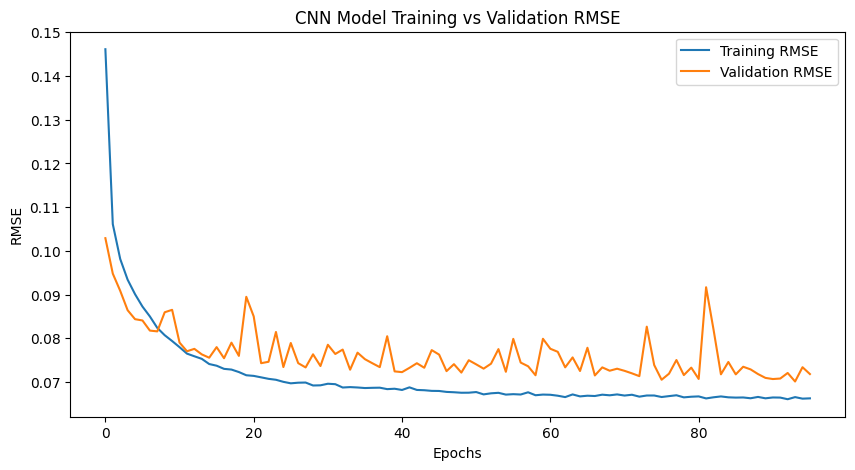

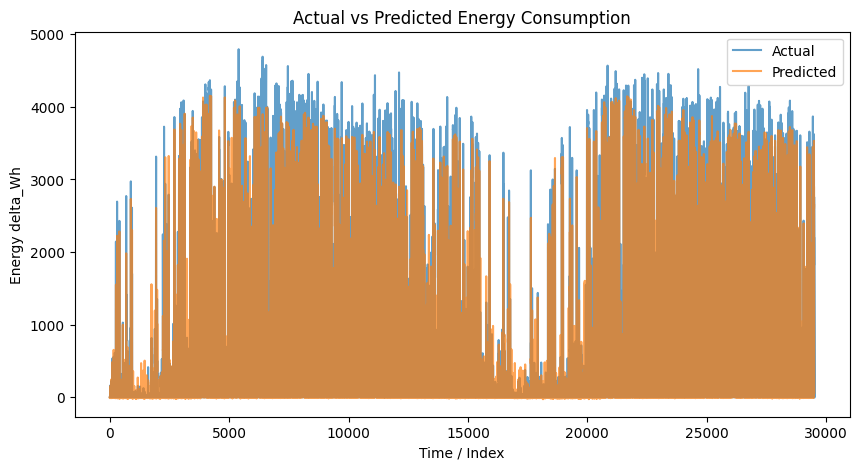

In [ ]:
# model = Sequential([
#     # First Conv Block with Large Context
#     Conv1D(32, 7, activation='relu', padding='causal',
#            dilation_rate=1, kernel_regularizer=l2(1e-05),
#            input_shape=(TIME_STEPS, X_train.shape[1])),
#     MaxPooling1D(2),
#     BatchNormalization(),
#     SpatialDropout1D(0.2),

#     # Second Conv Block with Medium Context
#     # Since kernel_size_first is 7, we set block2 kernel to 3
#     Conv1D(64, 3, activation='relu', padding='causal',
#            dilation_rate=3, kernel_regularizer=l2(1e-05)),
#     BatchNormalization(),
#     SpatialDropout1D(0.3),
    
#     # Third Conv Block with Local Context
#     Conv1D(128, 3, activation='relu', padding='causal',
#            dilation_rate=6, kernel_regularizer=l2(1e-05)),
#     GlobalAveragePooling1D(),
    
#     # Final Dense Layers
#     Dense(128, activation='relu', kernel_regularizer=l2(1e-05)),
#     Dropout(0.3),
#     Dense(1)
# ])

# optimizer = Adam(learning_rate=0.0003, clipnorm=0.5)
# model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# callbacks = [
#     EarlyStopping(patience=20, monitor='val_mae', restore_best_weights=True),
#     TerminateOnNaN()
# ]

# #   Memory-Efficient Training
# history = model.fit(
#     X_train_seq, y_train_seq,
#     epochs=100,
#     batch_size=64,
#     validation_data=(X_test_seq, y_test_seq),
#     callbacks=callbacks,
#     verbose=1
# )

# #   Make Predictions
# y_pred_scaled = model.predict(X_test_seq)
# y_pred = scaler_y.inverse_transform(y_pred_scaled)

# #   Evaluate
# y_test_seq_unscaled = scaler_y.inverse_transform(y_test_seq)

# mae = mean_absolute_error(y_test_seq_unscaled, y_pred)
# mse = mean_squared_error(y_test_seq_unscaled, y_pred)
# rmse = root_mean_squared_error(y_test_seq_unscaled, y_pred)
# r2 = r2_score(y_test_seq_unscaled, y_pred)

# print("MAE:", mae)
# print("MSE:", mse)
# print("RMSE:", rmse)
# print("R^2:", r2)

# #   Plot Training vs. Validation RMSE over epochs
# train_rmse = np.sqrt(history.history['loss'])
# val_rmse = np.sqrt(history.history['val_loss'])

# plt.figure(figsize=(10, 5))
# plt.plot(train_rmse, label='Training RMSE')
# plt.plot(val_rmse, label='Validation RMSE')
# plt.xlabel("Epochs")
# plt.ylabel("RMSE")
# plt.title("CNN Model Training vs Validation RMSE")
# plt.legend()
# plt.show()

# #   Plot Actual vs. Predicted
# plt.figure(figsize=(10, 5))
# plt.plot(y_test_seq_unscaled, label='Actual', alpha=0.7)
# plt.plot(y_pred, label='Predicted', alpha=0.7)
# plt.xlabel('Time / Index')
# plt.ylabel('Energy delta_Wh')
# plt.title('Actual vs Predicted Energy Consumption')
# plt.legend()
# plt.show()


## LSTM

### LSTM Environment setup

In [13]:
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Dropout, Bidirectional, LayerNormalization
from keras.layers import Add

# Temporal Attention Layer
class TemporalAttention(tf.keras.layers.Layer):
    def __init__(self, units=64, **kwargs):
        super().__init__(**kwargs)
        self.W1 = Dense(units, activation='tanh')
        self.W2 = Dense(1, activation='linear')
        self.layernorm = LayerNormalization()
    
    def call(self, inputs):
        score = self.W2(self.W1(inputs))
        attention_weights = tf.nn.softmax(score, axis=1)
        context_vector = tf.reduce_sum(attention_weights * inputs, axis=1)
        return self.layernorm(context_vector)

### Base Model LSTM

In [ ]:


# Pure LSTM Model with Fixed Learning Rate
def build_pure_lstm(time_steps, n_features):
    inputs = Input(shape=(time_steps, n_features))
    
    # First LSTM Block
    x = Bidirectional(LSTM(128, return_sequences=True,
                        dropout=0.3, recurrent_dropout=0.3,
                        kernel_regularizer=l2(1e-3)))(inputs)
    x = LayerNormalization()(x)
    
    # Second LSTM Block
    x = LSTM(64, return_sequences=True,
            dropout=0.2, recurrent_dropout=0.2,
            kernel_regularizer=l2(1e-3))(x)
    x = LayerNormalization()(x)
    
    # Temporal Attention
    x = TemporalAttention(units=64)(x)
    
    # Dimension-aligned Dense Network
    residual = Dense(64)(x)  # Residual projection
    x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
    x = Dropout(0.4)(x)
    x = Dense(64, activation='relu', kernel_regularizer=l2(1e-3))(x)
    x = Add()([x, residual])  # Residual connection
    
    outputs = Dense(1, kernel_regularizer=l2(1e-3))(x)
    
    model = Model(inputs, outputs)
    
    # Fixed learning rate optimizer
    optimizer = Adam(learning_rate=0.001)
    
    model.compile(optimizer=optimizer,
                loss='mse',
                metrics=['mae'])
    return model

# Training Setup
model = build_pure_lstm(TIME_STEPS, X_train.shape[1])

# Callbacks (only early stopping)
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    min_delta=0.001
)

history = model.fit(
    X_train_seq, y_train_seq,
    epochs=100,
    batch_size=64,
    validation_data=(X_test_seq, y_test_seq),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
1076/1076 [==============================] - 108s 95ms/step - loss: 0.3887 - mae: 0.1075 - val_loss: 0.2234 - val_mae: 0.0416
Epoch 2/100
1076/1076 [==============================] - 107s 99ms/step - loss: 0.1606 - mae: 0.0595 - val_loss: 0.1083 - val_mae: 0.0400
Epoch 3/100
1076/1076 [==============================] - 105s 98ms/step - loss: 0.0802 - mae: 0.0572 - val_loss: 0.0560 - val_mae: 0.0592
Epoch 4/100
1076/1076 [==============================] - 110s 103ms/step - loss: 0.0414 - mae: 0.0573 - val_loss: 0.0281 - val_mae: 0.0542
Epoch 5/100
1076/1076 [==============================] - 110s 102ms/step - loss: 0.0221 - mae: 0.0543 - val_loss: 0.0150 - val_mae: 0.0489
Epoch 6/100
1076/1076 [==============================] - 113s 105ms/step - loss: 0.0136 - mae: 0.0538 - val_loss: 0.0102 - val_mae: 0.0419
Epoch 7/100
1076/1076 [==============================] - 114s 106ms/step - loss: 0.0108 - mae: 0.0517 - val_loss: 0.0130 - val_mae: 0.0708
Epoch 8/100
1076/1076 [=======

923/923 [==============================] - 9s 9ms/step
MAE: 178.72783706354662
MSE: 114686.9477650265
RMSE: 338.6546142680275
R^2: 0.893185109783755


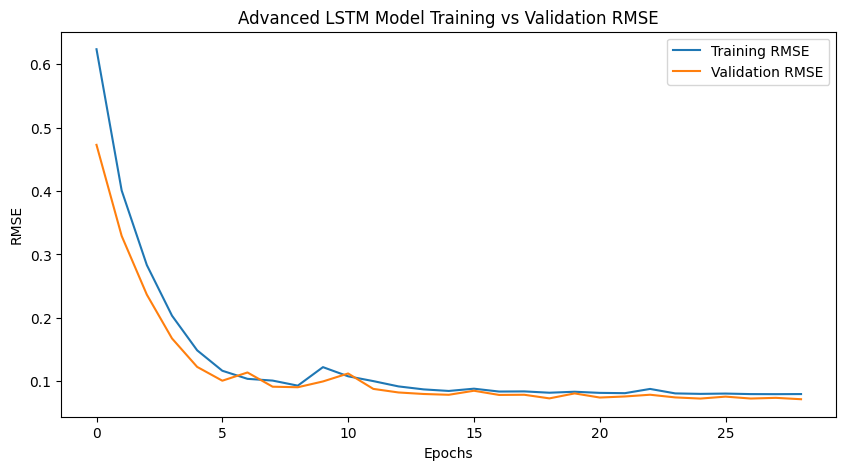

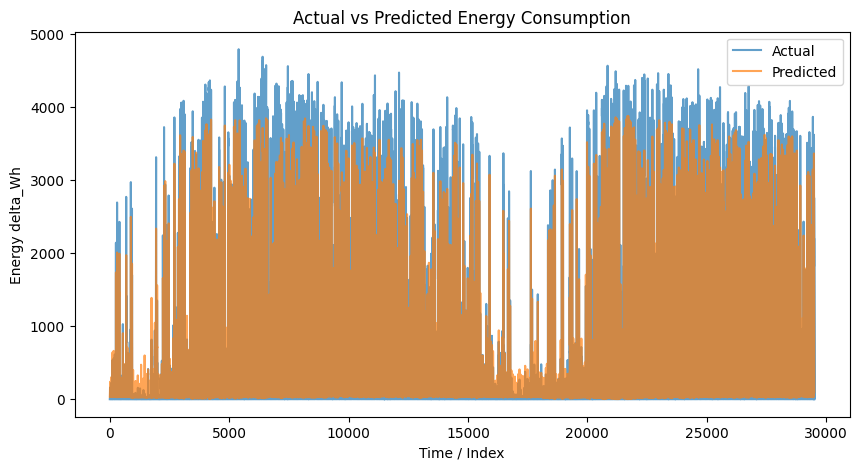

In [22]:

# 1. Generate predictions
y_pred_scaled = model.predict(X_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# 2. Inverse-transform the test target
y_test_seq_unscaled = scaler_y.inverse_transform(y_test_seq)

# 3. Compute metrics
mae = mean_absolute_error(y_test_seq_unscaled, y_pred)
mse = mean_squared_error(y_test_seq_unscaled, y_pred)
rmse = root_mean_squared_error(y_test_seq_unscaled, y_pred)
r2 = r2_score(y_test_seq_unscaled, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)

# 4. Plot Training vs. Validation RMSE over epochs
train_rmse = np.sqrt(history.history['loss'])
val_rmse = np.sqrt(history.history['val_loss'])

plt.figure(figsize=(10, 5))
plt.plot(train_rmse, label='Training RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.title("Advanced LSTM Model Training vs Validation RMSE")
plt.legend()
plt.show()

# 5. Plot Actual vs. Predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test_seq_unscaled, label='Actual', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.xlabel('Time / Index')
plt.ylabel('Energy delta_Wh')
plt.title('Actual vs Predicted Energy Consumption')
plt.legend()
plt.show()

### LSTM hyperparameter

In [ ]:
import tensorflow as tf
import keras_tuner as kt

def build_model(hp):
    inputs = tf.keras.Input(shape=(TIME_STEPS, X_train.shape[1]))
    
    # First LSTM layer with tunable units and dropout
    lstm_units1 = hp.Choice('lstm_units1', [128, 256])
    dropout1 = hp.Choice('dropout1', [0.2, 0.4])
    x = tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(
            lstm_units1,
            return_sequences=True,
            dropout=dropout1,
            recurrent_dropout=0.2,  # fixed value
            kernel_regularizer=tf.keras.regularizers.l2(1e-4)  # fixed value
        )
    )(inputs)
    x = tf.keras.layers.LayerNormalization()(x)
    
    # Second LSTM layer with tunable units; dropout fixed
    lstm_units2 = hp.Choice('lstm_units2', [64, 128])
    x = tf.keras.layers.LSTM(
        lstm_units2,
        return_sequences=True,
        dropout=0.2,  # fixed dropout2
        kernel_regularizer=tf.keras.regularizers.l2(1e-4)  # fixed l2_reg
    )(x)
    x = tf.keras.layers.LayerNormalization()(x)
    
    # Temporal Attention layer with tunable units
    attention_units = hp.Choice('attention_units', [64, 128])
    x = TemporalAttention(units=attention_units)(x)
    
    # Dense Network with fixed values
    dense_units = 64
    residual = tf.keras.layers.Dense(dense_units)(x)
    
    x = tf.keras.layers.Dense(128, activation='relu',
                              kernel_regularizer=tf.keras.regularizers.l2(1e-4))(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    x = tf.keras.layers.Dense(dense_units, activation='relu')(x)
    x = tf.keras.layers.Add()([x, residual])
    
    outputs = tf.keras.layers.Dense(1)(x)
    
    model = tf.keras.Model(inputs, outputs)
    
    # Tunable learning rate
    learning_rate = hp.Choice('learning_rate', [1e-3, 1e-4])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=32,  
    executions_per_trial=2,
    directory='tuning_results',
    project_name='lstm_attention_tuning'
)

# Early stopping callback
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    min_delta=0.001
)

# Run hyperparameter search
tuner.search(
    X_train_seq, y_train_seq,
    epochs=10,
    validation_data=(X_test_seq, y_test_seq),
    callbacks=[early_stop],
    verbose=1
)

# Retrieve the best hyperparameters after search
best_hps = tuner.get_best_hyperparameters()[0]
print(f"""
Best hyperparameters:
- LSTM 1 Units: {best_hps.get('lstm_units1')}
- Dropout 1: {best_hps.get('dropout1')}
- LSTM 2 Units: {best_hps.get('lstm_units2')}
- Attention Units: {best_hps.get('attention_units')}
- Learning Rate: {best_hps.get('learning_rate')}
""")


Trial 31 Complete [06h 23m 52s]
val_loss: 0.006255337502807379

Best val_loss So Far: 0.005423215916380286
Total elapsed time: 4d 08h 27m 47s

Best hyperparameters:
- LSTM 1 Units: 256
- Dropout 1: 0.2
- LSTM 2 Units: 64
- Attention Units: 64
- Learning Rate: 0.001



Trial 31 Complete [06h 23m 52s]
val_loss: 0.006255337502807379

Best val_loss So Far: 0.005423215916380286
Total elapsed time: 4d 08h 27m 47s

Best hyperparameters:
- LSTM 1 Units: 256
- Dropout 1: 0.2
- LSTM 2 Units: 64
- Attention Units: 64
- Learning Rate: 0.001

### Best LSTM

In [14]:
def build_pure_lstm(time_steps, n_features):
    inputs = Input(shape=(time_steps, n_features))
    
    # First LSTM Block with best hyperparameters
    x = Bidirectional(LSTM(256, return_sequences=True,
                           dropout=0.2, recurrent_dropout=0.2,
                           kernel_regularizer=l2(1e-3)))(inputs)
    x = LayerNormalization()(x)
    
    # Second LSTM Block remains as before
    x = LSTM(64, return_sequences=True,
             dropout=0.2, recurrent_dropout=0.2,
             kernel_regularizer=l2(1e-3))(x)
    x = LayerNormalization()(x)
    
    # Temporal Attention layer with 64 units
    x = TemporalAttention(units=64)(x)
    
    # Dimension-aligned Dense Network with residual connection
    residual = Dense(64)(x)  # Residual projection
    x = Dense(128, activation='relu', kernel_regularizer=l2(1e-3))(x)
    x = Dropout(0.4)(x)
    x = Dense(64, activation='relu', kernel_regularizer=l2(1e-3))(x)
    x = Add()([x, residual])  # Residual connection
    
    outputs = Dense(1, kernel_regularizer=l2(1e-3))(x)
    
    model = Model(inputs, outputs)
    
    # Optimizer with fixed learning rate
    optimizer = Adam(learning_rate=0.001)
    
    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mae'])
    return model

# Training Setup remains unchanged
model = build_pure_lstm(TIME_STEPS, X_train.shape[1])

# Callbacks (only early stopping)
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    min_delta=0.0001
)

history = model.fit(
    X_train_seq, y_train_seq,
    epochs=100,
    batch_size=64,
    validation_data=(X_test_seq, y_test_seq),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
1076/1076 [==============================] - 365s 334ms/step - loss: 0.4592 - mae: 0.1056 - val_loss: 0.2471 - val_mae: 0.0516
Epoch 2/100
1076/1076 [==============================] - 474s 440ms/step - loss: 0.1725 - mae: 0.0534 - val_loss: 0.1277 - val_mae: 0.1181
Epoch 3/100
1076/1076 [==============================] - 477s 443ms/step - loss: 0.0837 - mae: 0.0525 - val_loss: 0.0580 - val_mae: 0.0631
Epoch 4/100
1076/1076 [==============================] - 482s 448ms/step - loss: 0.0428 - mae: 0.0526 - val_loss: 0.0305 - val_mae: 0.0425
Epoch 5/100
1076/1076 [==============================] - 470s 437ms/step - loss: 0.0231 - mae: 0.0527 - val_loss: 0.0154 - val_mae: 0.0361
Epoch 6/100
1076/1076 [==============================] - 465s 432ms/step - loss: 0.0139 - mae: 0.0513 - val_loss: 0.0126 - val_mae: 0.0700
Epoch 7/100
1076/1076 [==============================] - 476s 442ms/step - loss: 0.0099 - mae: 0.0492 - val_loss: 0.0092 - val_mae: 0.0628
Epoch 8/100
1076/1076 [====

923/923 [==============================] - 39s 42ms/step
MAE: 167.61953028518175
MSE: 117764.4933305643
RMSE: 343.1683163267907
R^2: 0.8903188054821363


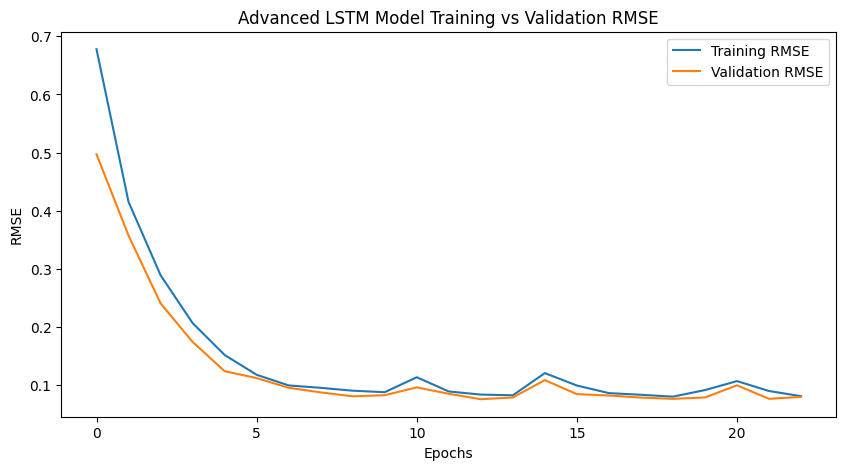

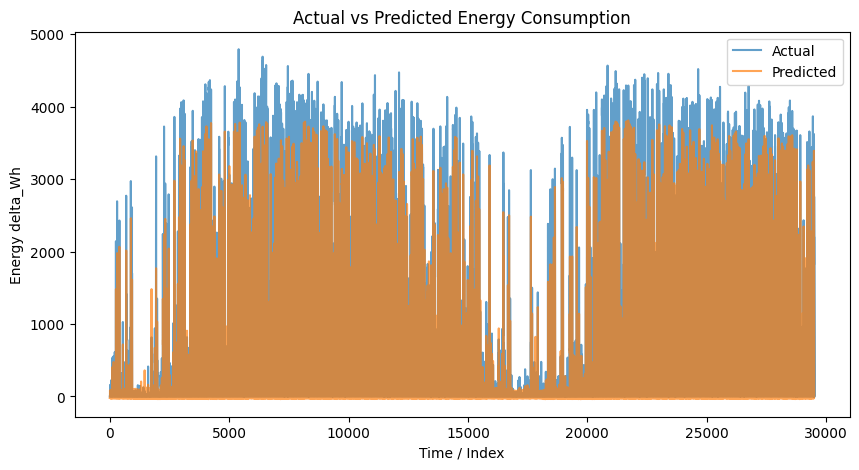

In [15]:

# 1. Generate predictions
y_pred_scaled = model.predict(X_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# 2. Inverse-transform the test target
y_test_seq_unscaled = scaler_y.inverse_transform(y_test_seq)

# 3. Compute metrics
mae = mean_absolute_error(y_test_seq_unscaled, y_pred)
mse = mean_squared_error(y_test_seq_unscaled, y_pred)
rmse = root_mean_squared_error(y_test_seq_unscaled, y_pred)
r2 = r2_score(y_test_seq_unscaled, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)

# 4. Plot Training vs. Validation RMSE over epochs
train_rmse = np.sqrt(history.history['loss'])
val_rmse = np.sqrt(history.history['val_loss'])

plt.figure(figsize=(10, 5))
plt.plot(train_rmse, label='Training RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.title("Advanced LSTM Model Training vs Validation RMSE")
plt.legend()
plt.show()

# 5. Plot Actual vs. Predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test_seq_unscaled, label='Actual', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.xlabel('Time / Index')
plt.ylabel('Energy delta_Wh')
plt.title('Actual vs Predicted Energy Consumption')
plt.legend()
plt.show()

MAE: 175.3177967724385
MSE: 120655.65235174245
RMSE: 347.35522502438687
R^2: 0.887626094241119

## Transformer

Epoch 1/20
1076/1076 [==============================] - 389s 356ms/step - loss: 0.0464 - mae: 0.1097 - val_loss: 0.0057 - val_mae: 0.0358
Epoch 2/20
1076/1076 [==============================] - 1188s 1s/step - loss: 0.0095 - mae: 0.0516 - val_loss: 0.0061 - val_mae: 0.0385
Epoch 3/20
1076/1076 [==============================] - 387s 360ms/step - loss: 0.0082 - mae: 0.0466 - val_loss: 0.0088 - val_mae: 0.0473
Epoch 4/20
1076/1076 [==============================] - 381s 354ms/step - loss: 0.0075 - mae: 0.0450 - val_loss: 0.0045 - val_mae: 0.0347
Epoch 5/20
1076/1076 [==============================] - 384s 357ms/step - loss: 0.0072 - mae: 0.0441 - val_loss: 0.0056 - val_mae: 0.0372
Epoch 6/20
1076/1076 [==============================] - 379s 352ms/step - loss: 0.0070 - mae: 0.0437 - val_loss: 0.0046 - val_mae: 0.0321
Epoch 7/20
1076/1076 [==============================] - 368s 342ms/step - loss: 0.0066 - mae: 0.0425 - val_loss: 0.0045 - val_mae: 0.0331
Epoch 8/20
1076/1076 [==============

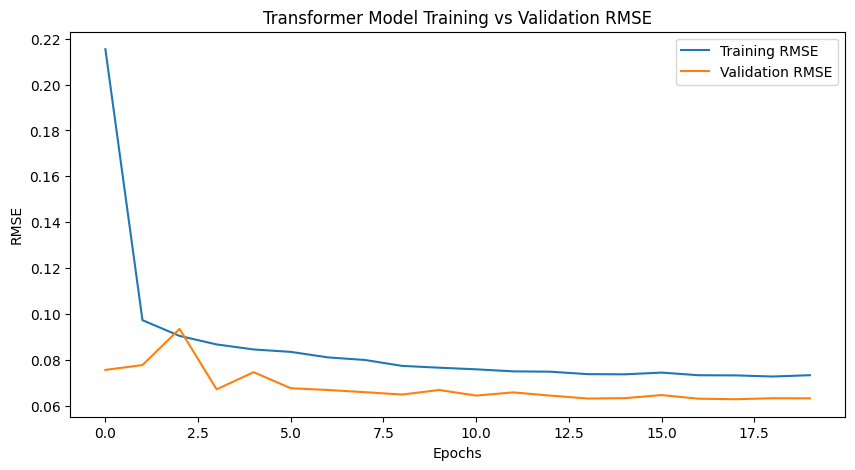

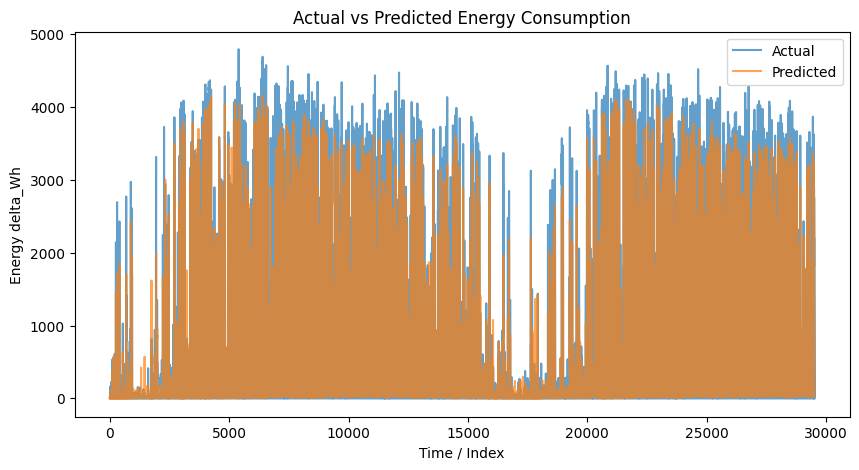

In [71]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input, Dense, Dropout, LayerNormalization,
    MultiHeadAttention, Lambda
)
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


# ==============================================
# 2. POSITIONAL ENCODING
# ==============================================
def positional_encoding(time_steps, d_model):
    position = np.arange(time_steps)[:, np.newaxis]  # shape (time_steps, 1)
    div_term = np.exp(np.arange(0, d_model, 2) * (-np.log(10000.0) / d_model))
    pe = np.zeros((time_steps, d_model))
    pe[:, 0::2] = np.sin(position * div_term)
    pe[:, 1::2] = np.cos(position * div_term)
    return tf.constant(pe[np.newaxis, ...], dtype=tf.float32)  # shape (1, time_steps, d_model)

# ==============================================
# 3. TRANSFORMER ENCODER LAYER
# ==============================================
class TransformerEncoder(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.att = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation='relu'),
            Dense(d_model)
        ])
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)
    
    def call(self, inputs, training):
        # Pre-LN Architecture
        x_norm = self.layernorm1(inputs)
        attn_output = self.att(x_norm, x_norm)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = inputs + attn_output
        
        x_norm = self.layernorm2(out1)
        ffn_output = self.ffn(x_norm)
        ffn_output = self.dropout2(ffn_output, training=training)
        return out1 + ffn_output


# ==============================================
# 5. SET TIME_STEPS=24 EVERYWHERE
# ==============================================
d_model = 128
num_heads = 8
ff_dim = 256
dropout_rate = 0.2
num_encoder_layers = 4


# Positional encoding for 24 time steps
pe = positional_encoding(TIME_STEPS, d_model)

# ==============================================
# 6. BUILD THE MODEL
# ==============================================
inputs = Input(shape=(TIME_STEPS, X_train.shape[1]))  # shape=(24, n_features)
x = Dense(d_model)(inputs)  # Project input to d_model dimension
x = x + pe  # Add positional encoding

# Stack multiple encoder layers
for _ in range(num_encoder_layers):
    x = TransformerEncoder(d_model, num_heads, ff_dim, dropout_rate)(x)

# Use final time step output for prediction
x = Lambda(lambda x: x[:, -1, :])(x)  # extract the last time step
x = Dense(64, activation='relu')(x)
x = Dropout(dropout_rate)(x)
outputs = Dense(1)(x)

model = Model(inputs, outputs)

# ==============================================
# 7. COMPILE & TRAIN
# ==============================================
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=1000,
    decay_rate=0.9
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_seq, y_train_seq,
    epochs=20,
    batch_size=64,
    validation_data=(X_test_seq, y_test_seq),
    callbacks=[early_stopping],
    verbose=1
)

# ==============================================
# 8. MAKE PREDICTIONS & EVALUATE
# ==============================================
y_pred_scaled = model.predict(X_test_seq)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

y_test_seq_unscaled = scaler_y.inverse_transform(y_test_seq)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

mae = mean_absolute_error(y_test_seq_unscaled, y_pred)
mse = mean_squared_error(y_test_seq_unscaled, y_pred)
rmse = root_mean_squared_error(y_test_seq_unscaled, y_pred)
from sklearn.metrics import r2_score
r2 = r2_score(y_test_seq_unscaled, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R^2:", r2)

# Plot training vs. validation RMSE
train_rmse = np.sqrt(history.history['loss'])
val_rmse = np.sqrt(history.history['val_loss'])

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(train_rmse, label='Training RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.title("Transformer Model Training vs Validation RMSE")
plt.legend()
plt.show()

# Plot Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test_seq_unscaled, label='Actual', alpha=0.7)
plt.plot(y_pred, label='Predicted', alpha=0.7)
plt.xlabel('Time / Index')
plt.ylabel('Energy delta_Wh')
plt.title('Actual vs Predicted Energy Consumption')
plt.legend()
plt.show()


## Hybrid model

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import (
#     Input, Conv1D, GlobalAveragePooling1D, Bidirectional, LSTM,
#     Dense, Dropout, LayerNormalization, MultiHeadAttention, concatenate
# )
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# # Custom Attention Layer (from LSTM model)
# class TemporalAttention(tf.keras.layers.Layer):
#     def __init__(self, units=32, **kwargs):
#         super().__init__(**kwargs)
#         self.W1 = Dense(units, activation='tanh')
#         self.W2 = Dense(1, activation='linear')
    
#     def call(self, inputs):
#         score = self.W2(self.W1(inputs))
#         attention_weights = tf.nn.softmax(score, axis=1)
#         context_vector = tf.reduce_sum(attention_weights * inputs, axis=1)
#         return context_vector

# # Transformer Encoder Block (from Transformer model)
# def transformer_encoder(inputs, d_model, num_heads, ff_dim, rate=0.1):
#     # Feature projection
#     x = Dense(d_model)(inputs)
    
#     # Self-attention
#     attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(x, x)
#     attn_output = Dropout(rate)(attn_output)
#     out1 = LayerNormalization(epsilon=1e-6)(x + attn_output)
    
#     # Feed-forward network
#     ffn_output = Dense(ff_dim, activation='relu')(out1)
#     ffn_output = Dense(d_model)(ffn_output)
#     ffn_output = Dropout(rate)(ffn_output)
#     return LayerNormalization(epsilon=1e-6)(out1 + ffn_output)

# def build_hybrid_model(time_steps, n_features):
#     # Shared input
#     input_layer = Input(shape=(time_steps, n_features))
    
#     # --- CNN Branch ---
#     cnn = Conv1D(128, 3, activation='relu', padding='causal', 
#                 dilation_rate=1, kernel_regularizer=l2(1e-4))(input_layer)
#     cnn = Conv1D(256, 3, activation='relu', padding='causal', 
#                 dilation_rate=2, kernel_regularizer=l2(1e-4))(cnn)
#     cnn = GlobalAveragePooling1D()(cnn)
    
#     # --- LSTM Branch ---
#     lstm = Bidirectional(LSTM(128, return_sequences=True, 
#                             kernel_regularizer=l2(1e-4)))(input_layer)
#     lstm = LSTM(64, return_sequences=True, 
#                kernel_regularizer=l2(1e-4))(lstm)
#     lstm = TemporalAttention(32)(lstm)
    
#     # --- Transformer Branch ---
#     transformer = transformer_encoder(input_layer, d_model=64, num_heads=2, ff_dim=128)
#     transformer = transformer_encoder(transformer, d_model=64, num_heads=2, ff_dim=128)
#     transformer = GlobalAveragePooling1D()(transformer)
    
#     # --- Feature Fusion ---
#     combined = concatenate([cnn, lstm, transformer])
    
#     # --- Final Dense Layers ---
#     x = Dense(128, activation='relu', kernel_regularizer=l2(1e-4))(combined)
#     x = Dropout(0.4)(x)
#     x = Dense(64, activation='relu', kernel_regularizer=l2(1e-4))(x)
#     x = Dropout(0.3)(x)
#     output = Dense(1)(x)
    
#     model = Model(inputs=input_layer, outputs=output)
    
#     # Optimizer with gradient clipping
#     optimizer = Adam(learning_rate=0.001, clipvalue=0.5)
#     model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    
#     return model

# # ================================
# #       Model Training
# # ================================
# hybrid_model = build_hybrid_model(TIME_STEPS, X_train.shape[1])

# callbacks = [
#     EarlyStopping(patience=15, restore_best_weights=True),
#     ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6)
# ]

# history = hybrid_model.fit(
#     X_train_seq, y_train_seq,
#     epochs=20,
#     batch_size=64,
#     validation_data=(X_test_seq, y_test_seq),
#     callbacks=callbacks,
#     verbose=1
# )

# # ================================
# #       Model Evaluation
# # ================================
# # Use same evaluation code as previous models
# y_pred_scaled = hybrid_model.predict(X_test_seq)
# y_pred = scaler_y.inverse_transform(y_pred_scaled)

# y_test_seq_unscaled = scaler_y.inverse_transform(y_test_seq)

# mae = mean_absolute_error(y_test_seq_unscaled, y_pred)
# mse = mean_squared_error(y_test_seq_unscaled, y_pred)
# rmse = np.sqrt(mse)
# r2 = r2_score(y_test_seq_unscaled, y_pred)

# print("Hybrid Model Performance:")
# print("MAE:", mae)
# print("MSE:", mse)
# print("RMSE:", rmse)
# print("R^2:", r2)